# 1- INTRODUCTION

<div style="text-align: justify">The dataset explored in this assignment presents observations from a haulage company regarding to fails on the APS system and other systems of trucks. The scenario that will be studied is presented below:</div>

#### Scenario:

<div style="text-align: justify">You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.  The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.<br>

This project will focus in discovering how many features are necessary to retain 99.5% of information of the dataset using different approaches, applying PCA to reduce the number of features and creating a predictive model that tries to identify whether a fail was occasioned by APS system or not.<br>

Different strategies will be applied aiming to get the best answer from the dataset. A function that inputs different criteria to change strategies will be created by the end easing the process of attempting to get better results. </div>

# 2- IMPORTING ALL THE LIBRARIES

<div style="text-align: justify">To facilitate understanding of the coding and keep it as neat as possible, all the libraries are imported by the beginning, independently of exactly where on the code it will be used.</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
from sklearn.decomposition import PCA

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPAC

In [5]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE 

# 3- READING THE DATASET AND APPLYING EXPLORATORY DATA ANALYSIS

The first step is reading the dataset and starting looking to it aiming to understand general ideas and patterns within the dataset.

In [6]:
df = pd.read_csv('aps_failure_set.csv')

In [7]:
#Visualizing the dataset to identify preliminarily features

df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [9]:
df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

<div style="text-align: justify">The dataset is composed by 60000 observations and 171 features. The first column of the dataset is named 'class', and it is composed only by categorical values. As it was described on the scenario, it contains information of whether a fail was originated from the APS system or not. The second column straight after 'class' is named 'aa_000', and names of columns go unti 'eg_000' through a logic on which sometimes the same group of letters has differents numbers, for instance 'ee_002, 'ee_003', and so on, and sometimes the string has only number 000.<br>

It is possible to identify that 'class' has 59000 negative observations and 1000 positive observations, what classifies the dataset as highly unbalanced. Therefore is expected that a method to undersampling of oversampling will be necessary to apply machine learning methods on the dataset.<br>

At first sight, it seams that in exception of 'class', all the columns are composed by numeric values. Nevertheless, the function info() returned the information that the dataset is completely composed by categorical variables, exept one feature.<br>

This is ocasioned by mix of variables in the dataset. It is possible to identify immediatly that some columns contain the string "na" amid numerical values, this is responsible to transform this specific column in an object to the coding. While it is possible to just force every column to numerical values and coerce errors, what would transform them into Missing Values, it is necessary first to check if there is any other value that might be important to the understanding of the dataset.<br>

Firstly, as the scenario did not describe any importance regarding name of columns, its names will be changed removing the string '_0' so they can look more neat, and can be called easier in case needed.<br>

The next step is creating a function that tries to transform values in float and in case it is unable to do it, in other words, if the function receives an error, it returns this value. This function was addapted from a function suggested by Martin (2021), and it will be used in this project. This function will be put into a loop to try every single value in the dataset out of the column 'class', and an array will be used to store all the values that can not be converted to numeric in the dataset. </div>

In [10]:
df.columns = df.columns.str.replace('_0', '')

In [11]:
#This function was addapted from a function presented in the following link.
#https://drawingfromdata.com/pandas/dtypes/finding-invalid-values-in-numerical-columns.html

def check_float(value):
    try:
        float(value)
        return
    except ValueError:
        return value

In [12]:
#https://www.datacamp.com/tutorial/loops-python-tutorial?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720818&utm_adgroupid=143216588777&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=652967469589&utm_targetid=dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=1007850&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-n-eu_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na&gclid=CjwKCAjw8-OhBhB5EiwADyoY1VTAgGVq3ULs6geWaBi99vsu_wYe3AEah79xolw_76eNOZsTIOCu5BoCboMQAvD_BwE

missingvalues = []
for column in df.iloc[:, 1:]:
    a = df[column].apply(check_float).unique()
    missingvalues = np.append(missingvalues, a)

In [13]:
missingvalues = pd.DataFrame(missingvalues)
missingvalues.iloc[:, 0].unique()

array([None, 'na'], dtype=object)

<div style="text-align: justify">It is possible to verify that only values None and 'na' are among the dataset, therefore we identify that there are no important values to be analysed on missing data. Hence, we can apply the method to transform numeric columns into integers and coerce errors. The code below is used with this function, according to Stack Overflow. (n.d.).</div>

In [14]:
cols = df.columns.drop('class')
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')

<div style="text-align: justify">After the dataset has been converted entirely to numerical, it is necessary to analyse how much data is missing this dataset, and start making decisions about these missing data.</div>

In [15]:
df.describe()

,aa00,ab00,ac00,ad00,ae00,af00,ag00,ag01,ag02,ag03,...,ee02,ee03,ee04,ee05,ee06,ee07,ee08,ee09,ef00,eg00
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [16]:
nullvalues = df.isnull().sum().reset_index(name = 'counting')

In [17]:
nullvalues['percentages'] = nullvalues['counting']/len(df['class'])

In [18]:
nullvalues.head()

,index,counting,percentages
0,class,0,0.000000
1,aa00,0,0.000000
2,ab00,46329,0.772150
3,ac00,3335,0.055583
4,ad00,14861,0.247683


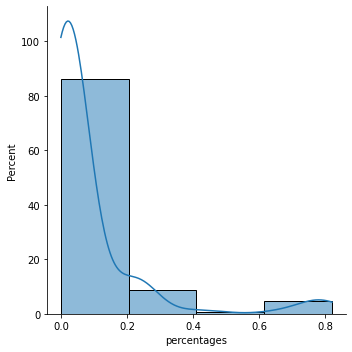

In [19]:
fg = sns.displot(data=nullvalues, x='percentages', stat='percent', kde=True, bins = 4)

<div style="text-align: justify">It is possible to verify that the dataset has over 80% of its data missing less than 20% of information, and almost 10% of its information missing over 50% of information. <br>

In this project, to reduce the amount of missing data, two strategies will be applied:<br>

1- Drop features and index that miss over 50% information.<br>

2- Try different methods to imput the remaining missing data and see its influence in PCD and in the accuracy of machine learning models.<br>

The first step will be drop every feature that miss over 50% of information. To make this, it will be used the matrix nullvalues, and index of percentages over 50% will be dropped in the original dataframe, df.</div>

In [20]:
higher50 = nullvalues[nullvalues['percentages'] >=0.5]

In [21]:
print(higher50.shape)

(8, 3)


<div style="text-align: justify">8 features was found to have over 50% of data missing, and they will be, therefore, dropped on the original dataset. They represent 4.7% of the features of the dataset.</div>

<div style="text-align: justify">The same procedure applyed to the columns will be applied to the rows. The intention is drop any observation that presents over 50% of unknown values. In this case it was made a loop to analyse the amount of missing data row by row.</div>

In [22]:
missingrows = pd.DataFrame({'index':[],'counting':[]})
for row in range(len(df)):
    a = df.iloc[row, :].isnull().sum()
    new_row = {'index':row, 'counting': a}
    missingrows = missingrows.append(new_row, ignore_index= True)

In [23]:
missingrows['percentages'] = missingrows['counting']/len(df.columns)

In [24]:
rowshigher50 = missingrows[missingrows['percentages'] >=0.5]
rowshigher50.head()

,index,counting,percentages
56,56.0,168.0,0.982456
164,164.0,88.0,0.514620
204,204.0,92.0,0.538012
502,502.0,168.0,0.982456
1106,1106.0,93.0,0.543860


In [25]:
print(rowshigher50.shape)

(420, 3)


<div style="text-align: justify">It is possible to verify that there are 420 rows has over 50% of data missing, and therefore they will be dropped. They represent aproximately 0.7% of the dataset, and excluding them should not represent big changes on the shape of the data.</div>

<div style="text-align: justify">The next steps will be verifying if the dataset contains any column composed only by unique values, which would make this column useless for predictive models, and also if it has duplicated values.</div>

In [26]:
#Evaluating if there is any column with only unique values.

uniquevalues = []
for column in df:
    a = df[column].is_unique
    uniquevalues = np.append(uniquevalues, a)

In [27]:
np.unique(uniquevalues)

array([0.])

There are no columns on the dataset composed only by unique values, therefore no column can be dropped for this reason.

Next, the dataset will be analysed to identify duplicated values.

In [28]:
duplicate_rows_df = df[df.duplicated()]

print('number of duplicate row: ', duplicate_rows_df.shape)

number of duplicate row:  (0, 171)


<div style="text-align: justify">There was no duplicated rows found. The next step will be analyse whether some columns are normal distributions or not. In the case the column is considered a normal distribution, 95% of the values of that column are within 2 standard deviation from the mean. Therefore, we are able to replace missing values for random values 2 standard deviation distant from the mean of this specific column. The normality test can be conducted through a visual approach. However, once in this case the amount of information is too large to analyse graph by graph, statistics data must be applyied to verify normality of the columns. <br>

Two tests are available according to Zach (2022), a Shapiro-test and a Kolmogorov-Smirnov test. Although both test have the same functionality, the Shapiro-test can only handle up to 5000 observations and it is more indicated to small number of samples, according to www.statsdirect.com. (n.d.). Normality Tests and Gupta, A., Mishra, P., Pandey, C., Singh, U., Sahu, C. and Keshri, A. (2019), whereas the Kolmogorov Smirnov test in more indicated to large samples. <br>

In this case the data will be evaluated according to the Kolmogorov-Smirnov test. The Kolmogorov-Smirnov consists in the hypothesis:<br>
H0 - Data comes from a normal distribution.<br>
HA - Data does not come from a normal distribution.<br>
The test returns a p-values in which.<br>
p < 0.05, Reject H0, thus the sample does not come from a normal distribution.<br>
p >= 0.05, Do not reject H0, thus the sample does come from a normal distribution.<br>

The p-value will be calculated in a loop for each column and stored in a dataframe with features. Afterwards, it will be filtered if this dataframe contains any p-value >= 0.05, and in case it has, this features will be considered potential to substituion by its mean.</div>

In [29]:
df.head()

,class,aa00,ab00,ac00,ad00,ae00,af00,ag00,ag01,ag02,...,ee02,ee03,ee04,ee05,ee06,ee07,ee08,ee09,ef00,eg00
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [30]:
normaltest = pd.DataFrame({'feature': [], 'stat':[],'pvalue':[]})
for column in df.iloc[:, 1:]:
    stat, pvalue = kstest(df[column].dropna(), 'norm')
    new_row = {'feature': column, 'stat':stat,'pvalue':pvalue}
    normaltest = normaltest.append(new_row, ignore_index= True)

In [31]:
normaltest

,feature,stat,pvalue
0,aa00,0.989852,0.0
1,ab00,0.500000,0.0
2,ac00,0.832175,0.0
3,ad00,0.934703,0.0
4,ae00,0.500000,0.0
...,...,...,...
165,ee07,0.859767,0.0
166,ee08,0.703671,0.0
167,ee09,0.500000,0.0
168,ef00,0.500000,0.0


In [32]:
normaltest[normaltest.pvalue > 0.05]

,feature,stat,pvalue


<div style="text-align: justify">None of the features analysed can be considered normal, therefore applying the mean or values nearby the mean randomly is not a good option, because it is known that the data is not represented by its mean. For the main attempt realized in this project, null values will be imputed by the median of each column, which is more appropriate to data which is not normal. Nevertheless, by the end the option of the mean will be applied to verify and compare results.<br>

All the exploratory analysis is finished at this point, and from now, all the steps to clean the data will be applied, according to the conclusions found in the exploratory analysis, which where:<br>

1 - Removing features with over 50% of missing data.<br>

2 - Removing rows with over 50% of missing data.<br>

3 - Imputing the remaining missing data with its median.</div>

# 4- Cleaning the data and preparing the data

## 4.1- Removing features with over 50% of missing data.

In [33]:
df = df.drop(higher50['index'], axis = 1)

In [34]:
df.shape

(60000, 163)

After doing that we can verify that the dataset that had originally 171 features, was reduced to 163.

## 4.2- Removing rows with over 50% of missing data

In [35]:
df.drop(rowshigher50['index'], axis = 0, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59580 entries, 0 to 59999
Columns: 163 entries, class to eg00
dtypes: float64(161), int64(1), object(1)
memory usage: 74.5+ MB


In [37]:
df.reset_index(drop = True, inplace = True)

<div style="text-align: justify">It is possible to verify that after these procedure the dataset was reduced from 60000 observations and 171 features, to 59580 observations and 163 features. </div>

<div style="text-align: justify">All steps after this milestones will be explored through a function described in the end of the report. It is possible to input different options desired for imputing missing data, scaling, outliers, oversampling data, and analyse different results without running though all steps again. </div>

## 4.3- Scaling

<div style="text-align: justify">It was verified that the dataset presents a high variance. A factor that might occasion this is different unities in different features. In the case of this study it is not known the unity of different features. However, to make sure all of the data is easy to understand, treat, and be found correlation, it is a good procedure to put all the data in the same scale. In this study data will be rescaled using the method StandarScaler, bringing the mean to all the data to 0, and the variance to 1, what will transform all features to the same magnitude. As will be disc|ussed in the conclusions, the best model was found with scaling, however, at a cost of a much higher processing power. Therefore, models without scaling will also be explored and discussed by the end of the report.</div>

In [38]:
scaler = StandardScaler()

In [39]:
a = df.drop(columns = ['class'])
scaled = scaler.fit_transform(a)
df2 = pd.DataFrame(scaled, columns=df.drop(columns = ['class']).columns)
df2['class']=df['class']
df2.reset_index(drop = True, inplace=True)
df2.head()

,aa00,ac00,ad00,ae00,af00,ag00,ag01,ag02,ag03,ag04,...,ee03,ee04,ee05,ee06,ee07,ee08,ee09,ef00,eg00,class
0,0.120660,2.229512,-0.004714,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.167992,...,0.520204,0.235997,0.067950,0.006111,-0.108637,-0.145646,-0.176698,-0.020756,-0.024106,neg
1,-0.179661,-0.448529,NaN,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.175998,...,-0.060559,-0.130269,-0.132263,-0.186242,-0.153111,-0.091409,-0.145106,-0.020756,-0.024106,neg
2,-0.124731,-0.448529,-0.004718,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.182998,...,-0.094176,-0.018364,0.014208,-0.011121,-0.108598,-0.096861,-0.165873,-0.020756,-0.024106,neg
3,-0.407077,-0.448529,-0.004719,-0.042266,-0.004944,-0.010817,-0.028417,-0.057152,-0.115642,-0.182760,...,-0.388436,-0.381373,-0.351211,-0.311335,-0.200090,-0.308732,-0.176698,0.893450,3.594212,neg
4,0.011763,-0.448527,-0.004709,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.165251,...,0.034711,-0.034371,-0.041451,-0.042751,-0.019703,0.657780,-0.151045,-0.020756,-0.024106,neg


## 4.4- Imputing the remaining missing data with its median.

In [40]:
df2.isnull().sum()

aa00         0
ac00      3085
ad00     14493
ae00      2254
af00      2254
         ...  
ee08       279
ee09       279
ef00      2476
eg00      2476
class        0
Length: 163, dtype: int64

In [41]:
print ("The dataset will be imputed in: {0:.3}% of its values." .format(df.isnull().sum().sum()/(len(df['class'])*163)*100))

The dataset will be imputed in: 4.43% of its values.


So the dataset will be imputed in 4.43% of its values, what is not a very high amount.

In [42]:
df3 = df2.fillna(df2.median())
df3.reset_index(drop = True, inplace=True)
df3.head()

,aa00,ac00,ad00,ae00,af00,ag00,ag01,ag02,ag03,ag04,...,ee03,ee04,ee05,ee06,ee07,ee08,ee09,ef00,eg00,class
0,0.120660,2.229512,-0.004714,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.167992,...,0.520204,0.235997,0.067950,0.006111,-0.108637,-0.145646,-0.176698,-0.020756,-0.024106,neg
1,-0.179661,-0.448529,-0.004717,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.175998,...,-0.060559,-0.130269,-0.132263,-0.186242,-0.153111,-0.091409,-0.145106,-0.020756,-0.024106,neg
2,-0.124731,-0.448529,-0.004718,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.182998,...,-0.094176,-0.018364,0.014208,-0.011121,-0.108598,-0.096861,-0.165873,-0.020756,-0.024106,neg
3,-0.407077,-0.448529,-0.004719,-0.042266,-0.004944,-0.010817,-0.028417,-0.057152,-0.115642,-0.182760,...,-0.388436,-0.381373,-0.351211,-0.311335,-0.200090,-0.308732,-0.176698,0.893450,3.594212,neg
4,0.011763,-0.448527,-0.004709,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.165251,...,0.034711,-0.034371,-0.041451,-0.042751,-0.019703,0.657780,-0.151045,-0.020756,-0.024106,neg


# 5- Detecting Outliers

<div style="text-align: justify">The next step will be identifying and removing outliers. This step will be made separately for positive and negative classes. This will be made because we do not know how the dataset behave in each class, therefore, mean and distribution of the data may be important features of 'pos' and 'neg' class. This step was described in this project, however, it was identified during its execution that models did not behave well with the exclusion of outliers. This happens because the distribution of the data in the dataset is in such a way that almost all the dataset is identified as outlier. The result does change depending on the imputation method used, but overall, in all cases analysed in this report, dropping outliers did not benefited the accurary of models, and in some cases, it made it impossible, because there was not enought values.</div>

In [43]:
#Detecting outliers for positive class
dfpos = df2[(df2['class'] == 'pos')]
Q1pos = dfpos.quantile(0.25)
Q3pos = dfpos.quantile(0.75)
IQRpos = Q3pos - Q1pos
print(IQRpos)
dfpos.shape

aa00    4.198937
ac00    0.000003
ad00    0.000045
ae00    0.000000
af00    0.000000
          ...   
ee07    1.717325
ee08    1.045202
ee09    0.040070
ef00    0.000000
eg00    0.000000
Length: 162, dtype: float64


(992, 163)

In [44]:
dfpos = dfpos[~((dfpos < (Q1pos - 1.5*IQRpos)) | (dfpos > (Q3pos + 1.5*IQRpos))).any(axis=1)]
dfpos.shape

(24, 163)

In [45]:
#Detecting outliers for negative class
dfneg = df2[(df2['class'] == 'neg')]
Q1neg = dfpos.quantile(0.25)
Q3neg = dfpos.quantile(0.75)
IQRneg = Q3neg - Q1neg
print(IQRneg)
dfneg.shape

aa00    4.621406e+00
ac00    7.666965e-08
ad00    2.968294e-07
ae00    0.000000e+00
af00    0.000000e+00
            ...     
ee07    6.301502e-01
ee08    1.730396e-01
ee09    6.318525e-05
ef00    0.000000e+00
eg00    0.000000e+00
Length: 162, dtype: float64


(58588, 163)

In [46]:
dfneg = dfneg[~((dfneg < (Q1neg - 1.5*IQRneg)) | (dfneg > (Q3neg + 1.5*IQRneg))).any(axis=1)]
dfneg

,aa00,ac00,ad00,ae00,af00,ag00,ag01,ag02,ag03,ag04,...,ee03,ee04,ee05,ee06,ee07,ee08,ee09,ef00,eg00,class
877,0.428138,-0.448529,-0.004721,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,-0.020756,-0.024106,neg
7184,-0.406733,NaN,NaN,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.179395,...,-0.387961,-0.381309,-0.351200,-0.311251,-0.199928,-0.308732,-0.176698,NaN,NaN,neg
9334,0.280125,-0.448529,-0.004721,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,-0.020756,-0.024106,neg
9456,2.350827,-0.448529,NaN,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,-0.020756,-0.024106,neg
19164,-0.395915,-0.448529,NaN,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,-0.020756,-0.024106,neg
27133,-0.405095,NaN,NaN,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.174248,...,-0.387552,-0.380854,-0.347502,-0.309296,-0.198476,-0.308665,-0.176698,NaN,NaN,neg
31010,-0.089166,NaN,NaN,NaN,NaN,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,NaN,NaN,neg
34371,-0.346090,NaN,NaN,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,0.006136,0.109004,...,-0.336169,-0.335255,-0.295124,-0.204195,-0.168655,-0.308028,-0.176698,NaN,NaN,neg
39246,1.114734,-0.448529,-0.004721,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,-0.020756,-0.024106,neg
43732,0.280125,-0.448529,-0.004721,-0.042266,-0.052539,-0.010817,-0.028417,-0.057152,-0.116059,-0.183692,...,-0.388521,-0.381422,-0.351250,-0.311344,-0.200090,-0.308732,-0.176698,-0.020756,-0.024106,neg


The next step would be responsible for recovering the dataset with negative and positive values.

df2 = dfpos.append(dfneg, ignore_index= True)
df2.info()

<div style="text-align: justify">As it is possible to verify above, for a dataset which imputed null values through its median, after analysing and dropping outliers would rest only 8 rows and 163 features! Therefore this step was withdrawn from the main model developed.</div>

## 6- APLLYING SMOTE TO REBALANCE THE DATASET

<div style="text-align: justify">As it was identified during the exploratory data analysis, the dataset is highly unbalanced regarding positive and negative observations, thus, it is an important step to improve accuracy of machine learning model balancing the data. This balacing of the data can be made by oversampling and undersampling. In this project, a method of oversampling will be used to generate synthetic observations for positive classes. The method applied will be SMOTE, and it is described below. The first step consists in splitting the dataset in independent variables and dependent.</div>

In [47]:
#Splitting the dataset in dependent and independent variables
X = df3.drop('class', axis = 1)   #dependent variable 
y = df3['class']
X.shape, y.shape

((59580, 162), (59580,))

<div style="text-align: justify">As it follows, it is applyied the SMOTE algorithm, which will rebalance the observations in the dataset through oversampling. After applying the function is possible to see the new dataset created has 117176 rows.</div>

In [48]:
smt = SMOTE()

X, y= smt.fit_resample(X, y)

In [49]:
X.shape, y.shape

((117176, 162), (117176,))

## 7- USING PCA METHOD TO DISCOVER NUMBER OF FEATURES TO RATAIN 99.5% OF DATA

<div style="text-align: justify">The next step will be using the PCA method to answer the task proposed on the assignement. To do this process, the first process is enconding the column 'class', to have it as number, and as it follows, verify through the array of the variance ratio, when it will have accumulated 99.5%. </div>

[0.32082464 0.42219999 0.48079846 0.52511034 0.56561721 0.59667404
 0.62687222 0.6526263  0.67765625 0.69652502 0.71198545 0.72638512
 0.74050092 0.75259189 0.76380761 0.77455835 0.78385022 0.79288228
 0.80174476 0.80983231 0.81754421 0.8247086  0.83179425 0.83873343
 0.84517429 0.85152623 0.85749221 0.86333505 0.86881817 0.874089
 0.87895741 0.88347738 0.88783014 0.8920325  0.89581775 0.89939352
 0.90291701 0.90636799 0.90971441 0.91295022 0.9161044  0.91898429
 0.92178853 0.92449832 0.92709084 0.92955092 0.93198606 0.93435075
 0.93663862 0.93885061 0.94098469 0.94305138 0.94502472 0.94694573
 0.94882053 0.95063096 0.95241149 0.95417037 0.95587438 0.95747729
 0.95900595 0.96052156 0.96199964 0.9633952  0.96476331 0.96608909
 0.96735718 0.968595   0.96975664 0.97087597 0.97196396 0.97303568
 0.97401862 0.97499193 0.97595894 0.97690811 0.97782749 0.97869696
 0.97952263 0.98034205 0.98110667 0.98185401 0.9825789  0.9832813
 0.98397188 0.98463146 0.98525381 0.98584564 0.98641429 0.9869775

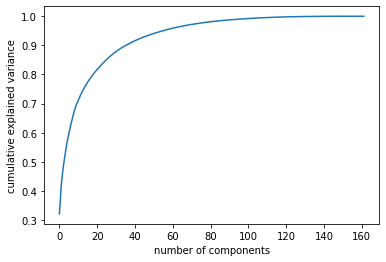

In [50]:
pca = PCA().fit(X)
variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(variance_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(np.cumsum(pca.explained_variance_ratio_))

To verify the amount of necessary features, instead of just relying in the graphic visualization, it was created a loop to verify the first value above 99.5%.

In [51]:
#Seeking on the array the minimun number of features to retain 99.5% of information in the dataset.

features= -1
for i in range(len(variance_ratio)):
    if variance_ratio[i] > 0.995:
        features= i
        break
features_needed = features+1
print('It is possible to verify that to retain 99.5% of information variation in the dataset, it is necessary {} features.'.format(features_needed))

It is possible to verify that to retain 99.5% of information variation in the dataset, it is necessary 109 features.


In [52]:
pca = PCA(features_needed)
projected = pca.fit_transform(X)

In [53]:
projected.shape, y.shape

((117176, 109), (117176,))

In [54]:
#Creating an authomatic way to name columns aiming to run sequences of tests
columns =[]
for i in range(1, features_needed+1):
    columns = np.append(columns, 'C'+str(i))

In [55]:
X_pca = pd.DataFrame(projected, columns = columns)
y.replace(['pos','neg'],[1,0], inplace=True)

In [56]:
X_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109
0,-11.108537,-1.577187,-0.590769,0.841192,1.541744,0.336983,-0.055223,0.163702,-0.171207,-0.236398,...,0.144345,1.471309,-0.355077,0.092845,0.547389,0.066427,-0.088293,-0.149509,-0.001109,-0.162835
1,-13.748262,-0.608540,0.012992,1.820262,0.573382,0.541601,-0.067363,0.026564,-0.433262,-0.039634,...,-0.840497,-0.991571,-0.262147,0.170151,-0.039170,-0.203342,0.139627,-0.023158,-0.100525,0.046784
2,-14.257252,-0.287933,0.156911,2.139628,0.479917,0.462466,-0.347768,-0.207824,-0.197103,-0.209220,...,0.092178,-0.294279,0.103932,0.025561,-0.202373,0.063207,-0.214575,-0.060671,0.025759,0.066026
3,-16.071595,0.152933,0.697719,2.454959,0.092762,0.474419,-0.216115,-0.247932,-0.238198,0.016587,...,0.282219,-0.162966,0.090729,0.042325,-0.162873,-0.019646,-0.244123,-0.030493,-0.383518,-0.260022
4,-12.976145,-0.686456,-0.020229,1.313439,0.838978,0.250142,-0.337550,-0.155160,-0.225064,-0.241277,...,0.059637,-0.235445,0.186440,-0.119549,-0.170565,-0.206081,-0.088424,-0.026702,0.039608,0.003330


In [57]:
y.shape

(117176,)

## 8- APPLYING MACHINE LEARN METHODS TO PREDICT FAILS

<div style="text-align: justify">The first step to apply Machine Learn Methods is splitting the dataset to be analysed in train variables and test variables. The train variables are those used to train the models to create predictions, and the test variables are those used to validate the model and analyse its accurary. The dataset was already split in dependent variable and independent variable before to apply SMOTE and PCA.<br>

In the case of this test it will be used a test size of 25% of the sample, and a training size of 75% of the sample. The random state is defined as 1 only to make possible reproductbility.</div>

In [58]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state = 1, stratify=y, test_size = 0.25)

In [59]:
np.bincount(y_train)

array([43941, 43941])

<div style="text-align: justify">The final step will be applying different Machine Learning Models to predict wheather a fail was occasioned in the APS system or not. The models explored are Logistic Regression, Linear Discriminant Analysis, K Neighbors Classified, Decision Tree Classifier and Gaussian Naive Bayes. At the beginning, Support Vacuum Machine was also tested, however it did not showed results, therefore it was let of the analysis. </div>

In [60]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

In [61]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_pca_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960003 (0.001789)
LDA: 0.919790 (0.003514)
KNN: 0.987460 (0.000958)
CART: 0.983933 (0.001552)
NB: 0.889943 (0.003389)


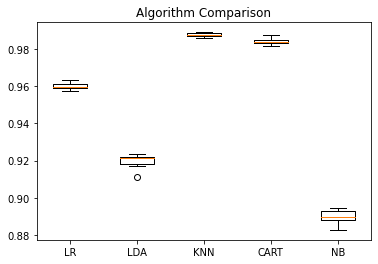

In [62]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [63]:
model =  KNeighborsClassifier()
model.fit(X_pca_train, y_train)
y_predict = model.predict(X_pca_test)

0.9872328804533351
[[14278   369]
 [    5 14642]]


<AxesSubplot:>

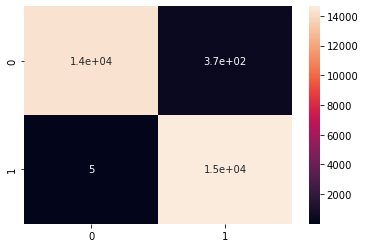

In [64]:
print(accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm, annot = True)

In [65]:
# Calculate the accuracy and recall
accuracy = accuracy_score(y_test, y_predict)

recall = recall_score(y_test, y_predict)

print(accuracy, recall)

0.9872328804533351 0.9996586331672015


## 9- Creating a function for testing

<div style="text-align: justify">After analysing the problem, a function was created to try different scenarios in regards to methods explored in this project. The function receive 4 inputs:<br>

arg1 - Selects whether or not it should be applyied standardization on the whole dataset before analysis.<br>
       arg1 = 1 will call for the standardization of the data <br>
       arg1 = any other values will skip the standartization and follow to the next step.<br><br>
       
arg2 - Selects the kind of imputation will be realized in the dataset.<br>
       arg2 = 'mean'. Each column will be imputated by its own mean.<br>
       arg2 = 'median'. Each column will be imputated by its own median.<br>
       arg2 = 'interpolate'. Each column will be interpolated by linear interpolar method.<br>
       arg2 = Any integer. In this case nulls will be replaced by any integer pre-decided and specified.<br><br>
                                                                                                                   
arg3 - It specifies whether or not outliers should be tracken and dropped of.<br><br>
    
arg4 - It specifies whether of not a SMOTE should be applyied to rebalance the dataset.</div>

In [79]:
def haulage_aps(arg1, arg2, arg3, arg4):
    
    
    #Creating a function to scaling the data
    if arg1 == 1:
        scaler = StandardScaler()
        a = df.drop(columns = ['class'])
        scaled = scaler.fit_transform(a)
        df2 = pd.DataFrame(scaled, columns=df.drop(columns = ['class']).columns)
        df2['class']=df['class']
        df2.reset_index(drop = True, inplace=True)
        
    else:
        df2 = df.copy()
        
    #Filling null data
    #Using mean
    if arg2 == 'mean':
        df3 = df2.fillna(df2.mean())
        df3.reset_index(drop = True, inplace=True)
    #Using median
    elif arg2 == 'median':
        df3 = df2.fillna(df2.median())
        df3.reset_index(drop = True, inplace=True)
    #Using interpolation method:
    elif arg2 == 'interpolate':
        df3 = df2.interpolate(method='linear', direction = 'forward')
        df3.reset_index(drop = True, inplace=True)
    else:
        df3 = df2.fillna(arg2)
        df3.reset_index(drop = True, inplace=True)
     
    #Deciding whether outliers should be tracked and dropped or not.
    if arg3 == 1:
        dfpos = df3[(df3['class'] == 'pos')]
        Q1pos = dfpos.quantile(0.25)
        Q3pos = dfpos.quantile(0.75)
        IQRpos = Q3pos - Q1pos
        dfpos = dfpos[~((dfpos < (Q1pos - 1.5*IQRpos)) | (dfpos > (Q3pos + 1.5*IQRpos))).any(axis=1)]
        dfneg = df3[(df3['class'] == 'neg')]
        Q1neg = dfpos.quantile(0.25)
        Q3neg = dfpos.quantile(0.75)
        IQRneg = Q3neg - Q1neg
        dfneg = dfneg[~((dfneg < (Q1neg - 1.5*IQRneg)) | (dfneg > (Q3neg + 1.5*IQRneg))).any(axis=1)]
        df3 = dfpos.append(dfneg, ignore_index= True)
        
    #Splitting the dataset in dependent and independent variables
    X = df3.drop('class', axis = 1)   #dependent variable 
    y = df3['class']
    
    #Applying Smote if required
    if arg4 == 1:
        smt = SMOTE()
        X, y = smt.fit_resample(X, y)
        
    
    pca = PCA().fit(X)
    variance_ratio = np.cumsum(pca.explained_variance_ratio_)
           
    #Seeking on the array the minimun number of features to retain 99.5% of information in the dataset.
    features= -1
    for i in range(len(variance_ratio)):
        if variance_ratio[i] > 0.995:
            features= i
            break
    
    features_needed = features+1
    print("Features needed to retain 99.5% of the variance: ", features_needed)
    pca = PCA(features_needed)
    
    projected = pca.fit_transform(X)  
    #Creating an authomatic way to run sequences of tests
    columns =[]
    for i in range(1, features_needed+1):
        columns = np.append(columns, 'C'+str(i))
    
    X_pca = pd.DataFrame(projected, columns = columns)
    y.replace(['pos','neg'],[1,0], inplace=True)
    
    #Splitting dataset
    X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state = 1, stratify=y, test_size = 0.25)
    
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    results = []
    names = []
    results2 = pd.DataFrame({'Model': [], 'Accuracy_mean':[],'std':[]})
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_pca_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        new_result2 = {'Model': model, 'Accuracy_mean': cv_results.mean(), 'std': cv_results.std()}
        results2 = results2.append(new_result2, ignore_index = True)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    maxindex=results2['Accuracy_mean'].idxmax()
    maxmodel=results2.iloc[maxindex, 0]
    maxmodel.fit(X_pca_train, y_train)
    y_predict = maxmodel.predict(X_pca_test)
    pyplot.boxplot(results, labels=names)
    pyplot.title('Algorithm Comparison')
    pyplot.show()
    print('The optimal model selected is:', maxmodel)
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot = True)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    print('Accuracy of the optimal model:', accuracy)
    print('Recall of the optimal model:', recall)

In [78]:
Scaling = ['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No']
Imput = ['Median', 'Mean', 'Interpolation', '0', '9e25', 'Median', '0', 'Median', '9e25']
Drop_outliers = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes']
SMOTE_Method = ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes']
data = {'Scaling': Scaling, 'Imput': Imput, 'Drop_outliers': Drop_outliers, 'SMOTE': SMOTE_Method}
Testes = pd.DataFrame(data)
print('The following tests will be executed using the function:\n\n')
print(Testes)

The following tests will be executed using the function:


  Scaling          Imput Drop_outliers SMOTE
0      No         Median            No   Yes
1      No           Mean            No   Yes
2      No  Interpolation            No   Yes
3      No              0            No   Yes
4      No           9e25            No   Yes
5      No         Median            No    No
6     Yes              0            No    No
7     Yes         Median            No   Yes
8      No           9e25           Yes   Yes


The results of the tests can be found below:

#### Test 0 - Standardization: No, Imputation: Median, Drop_outliers: No, SMOTE: Yes

Features needed to retain 99.5% of the variance:  6
LR: 0.917924 (0.008284)
LDA: 0.872443 (0.004184)
KNN: 0.968355 (0.001350)
CART: 0.965966 (0.002095)
NB: 0.912269 (0.016575)


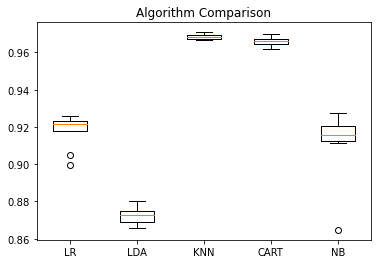

The optimal model selected is: KNeighborsClassifier()
Accuracy of the optimal model: 0.9699255820304499
Recall of the optimal model: 0.9859356864887008


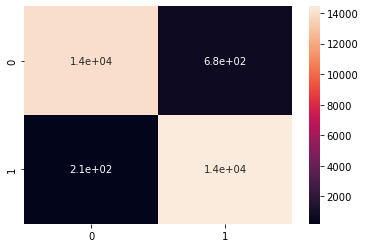

In [68]:
haulage_aps(arg1 = 0, arg2 = 'median', arg3 = 0, arg4 = 1)

#### Test 1 - Standardization: No, Imputation: Mean, Drop_outliers: No, SMOTE: Yes

Features needed to retain 99.5% of the variance:  6
LR: 0.875538 (0.003164)
LDA: 0.868221 (0.003234)
KNN: 0.969459 (0.001345)
CART: 0.974341 (0.001277)
NB: 0.857502 (0.021198)


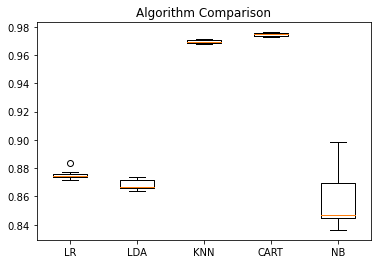

The optimal model selected is: DecisionTreeClassifier()
Accuracy of the optimal model: 0.9762750051205025
Recall of the optimal model: 0.9795862633986482


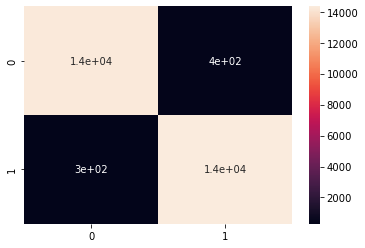

In [69]:
haulage_aps(arg1 = 0, arg2 = 'mean', arg3 = 0, arg4 = 1)

#### Test 2 - Standardization: No, Imputation: Interpolate, Drop_outliers: No, SMOTE: Yes

Features needed to retain 99.5% of the variance:  5
LR: 0.915978 (0.001769)
LDA: 0.866389 (0.002555)
KNN: 0.954541 (0.002048)
CART: 0.953585 (0.002110)
NB: 0.601899 (0.086115)


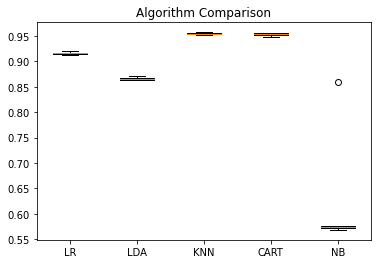

The optimal model selected is: KNeighborsClassifier()
Accuracy of the optimal model: 0.9562026353519492
Recall of the optimal model: 0.9718713729774016


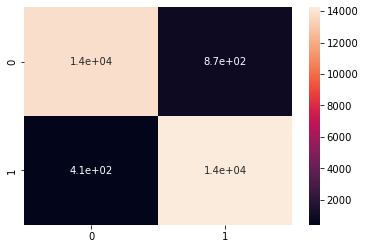

In [70]:
haulage_aps(arg1 = 0, arg2 = 'interpolate', arg3 = 0, arg4 = 1)

#### Test 3 - Standardization: No, Imputation: 0, Drop_outliers: No, SMOTE: Yes

Features needed to retain 99.5% of the variance:  6
LR: 0.913429 (0.006755)
LDA: 0.871293 (0.003204)
KNN: 0.967479 (0.000961)
CART: 0.964509 (0.002015)
NB: 0.903086 (0.014495)


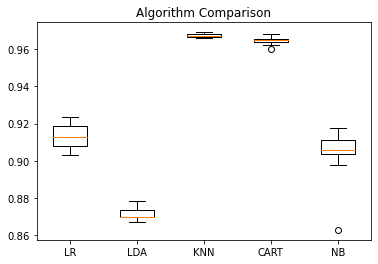

The optimal model selected is: KNeighborsClassifier()
Accuracy of the optimal model: 0.9681504744998976
Recall of the optimal model: 0.9827951116269543


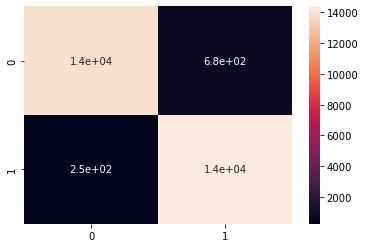

In [71]:
haulage_aps(arg1 = 0, arg2 = 0, arg3 = 0, arg4 = 1)

#### Test 4 - Standardization: No, Imputation: 9e25, Drop_outliers: No, SMOTE: Yes

Features needed to retain 99.5% of the variance:  15
LR: 0.821579 (0.003543)
LDA: 0.805683 (0.003880)
KNN: 0.821865 (0.035035)
CART: 0.838681 (0.004024)
NB: 0.767779 (0.003102)


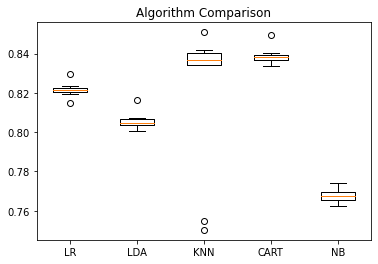

The optimal model selected is: DecisionTreeClassifier()
Accuracy of the optimal model: 0.839113811702055
Recall of the optimal model: 0.7645251587355772


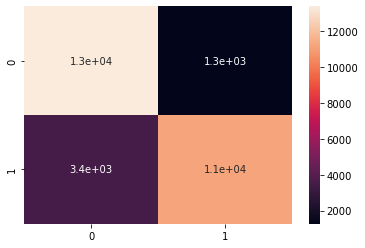

In [72]:
haulage_aps(arg1 = 0, arg2 = 9e25, arg3 = 0, arg4 = 1)

#### Test 5 - Standardization: No, Imputation: Median, Drop_outliers: No, SMOTE: No

Features needed to retain 99.5% of the variance:  3
LR: 0.254596 (0.242824)
LDA: 0.982164 (0.001724)
KNN: 0.982679 (0.001587)
CART: 0.980329 (0.001746)
NB: 0.255379 (0.241888)


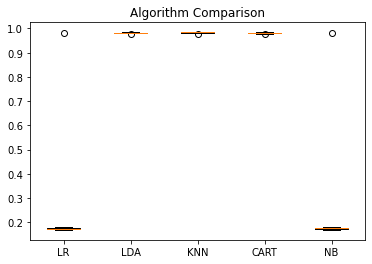

The optimal model selected is: KNeighborsClassifier()
Accuracy of the optimal model: 0.9818731117824774
Recall of the optimal model: 0.25806451612903225


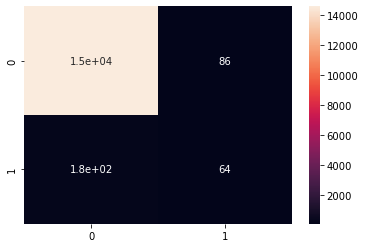

In [73]:
haulage_aps(arg1 = 0, arg2 = 'median', arg3 = 0, arg4 = 0)

#### Test 6 - Standardization: Yes, Imputation: 0, Drop_outliers: No, SMOTE: No

Features needed to retain 99.5% of the variance:  118
LR: 0.991071 (0.001173)
LDA: 0.989818 (0.001413)
KNN: 0.989728 (0.001299)
CART: 0.985834 (0.001297)
NB: 0.964328 (0.002136)


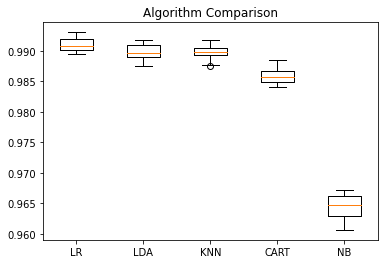

The optimal model selected is: LogisticRegression(multi_class='ovr', solver='liblinear')
Accuracy of the optimal model: 0.9905337361530715
Recall of the optimal model: 0.6169354838709677


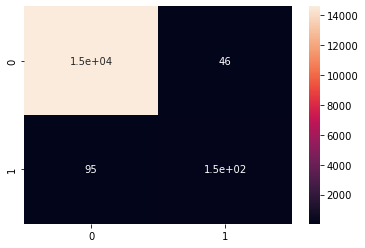

In [74]:
haulage_aps(arg1 = 1, arg2 = 0, arg3 = 0, arg4 = 0)

#### Test 7 - Standardization: Yes, Imputation: Mean, Drop_outliers: No, SMOTE: Yes

Features needed to retain 99.5% of the variance:  110
LR: 0.960731 (0.001904)
LDA: 0.920439 (0.002572)
KNN: 0.987540 (0.001095)
CART: 0.983114 (0.001242)
NB: 0.888953 (0.002961)


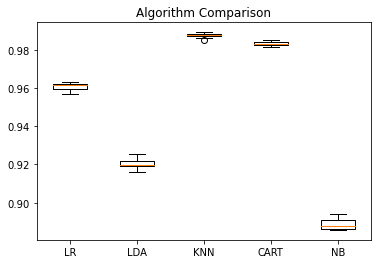

The optimal model selected is: KNeighborsClassifier()
Accuracy of the optimal model: 0.987267017136615
Recall of the optimal model: 0.9996586331672015


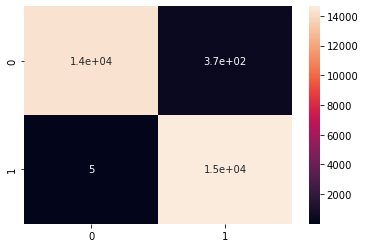

In [75]:
haulage_aps(arg1 = 1, arg2 = 'median', arg3 = 0, arg4 = 1)

#### Test 8 - Standardization: No, Imputation: 9e25, Drop_outliers: Yes, SMOTE: Yes

Features needed to retain 99.5% of the variance:  4
LR: 0.701724 (0.066423)
LDA: 0.701724 (0.066423)
KNN: 0.735977 (0.110625)
CART: 0.698391 (0.062103)
NB: 0.701724 (0.066423)


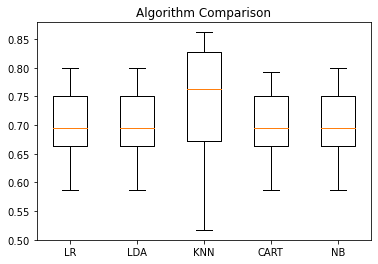

The optimal model selected is: KNeighborsClassifier()
Accuracy of the optimal model: 0.8061224489795918
Recall of the optimal model: 0.7346938775510204


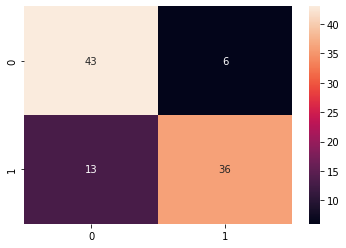

In [76]:
haulage_aps(arg1 = 0, arg2 = 9e25, arg3 = 1, arg4 = 1)

## Resume of results

In [80]:
test0 = ['6', 'KNeighborsClassifier', '0.9699', '0.9859']
test1 = ['6', 'DecisionTreeClassifier', '0.9762', '0.9795']
test2 = ['5', 'KNeighborsClassifier', '0.9562', '0.9718']
test3 = ['6', 'KNeighborsClassifier', '0.9681', '0.9827']
test4 = ['15','DecisionTreeClassifier', '0.8391', '0.7645']
test5 = ['3', 'KNeighborsClassifier', '0.9818', '0.2580']
test6 = ['118', 'LogisticRegression', '0.9905', '0.6169']
test7 = ['110', 'KNeighborsClassifier', '0.9872', '0.9996']
test8 = ['4', 'KNeighborsClassifier', '0.8061', '0.7346']
tests = [test0, test1, test2, test3, test4, test5, test6, test7, test8]
teste_pd = pd.DataFrame(tests, columns = ['Features_PCA','Better_MLModel', 'Accuracy', 'Recall'])
Testes['Features_PCA'] = teste_pd['Features_PCA']
Testes['Better_MLModel'] = teste_pd['Better_MLModel']
Testes['Accuracy']= teste_pd['Accuracy']
Testes['Recall'] = teste_pd['Recall']
print("The result of each test is found below: ")
Testes

The result of each test is found below: 


,Scaling,Imput,Drop_outliers,SMOTE,Features_PCA,Better_MLModel,Accuracy,Recall
0,No,Median,No,Yes,6,KNeighborsClassifier,0.9699,0.9859
1,No,Mean,No,Yes,6,DecisionTreeClassifier,0.9762,0.9795
2,No,Interpolation,No,Yes,5,KNeighborsClassifier,0.9562,0.9718
3,No,0,No,Yes,6,KNeighborsClassifier,0.9681,0.9827
4,No,9e25,No,Yes,15,DecisionTreeClassifier,0.8391,0.7645
5,No,Median,No,No,3,KNeighborsClassifier,0.9818,0.2580
6,Yes,0,No,No,118,LogisticRegression,0.9905,0.6169
7,Yes,Median,No,Yes,110,KNeighborsClassifier,0.9872,0.9996
8,No,9e25,Yes,Yes,4,KNeighborsClassifier,0.8061,0.7346


# 10- Conclusions

<div style="text-align: justify">As it is possible to verify through the chart above, different methods will lead to different results regarding to the method PCA to reduction of features. Up to a certain point, it is possible to reach very reliable results reducing the number of feature from 162 to only 5 or 6, as it is seen on rows 0 to 3, on which after reducing the dataset to the amount of features indicated by the method PCA and applying a machine learning method to the problem of classification, results of both accurary and recall go over 95%. Furthermore, the sequence of tests also show that having more features is not a straightforward indicator that more accurate models can be built. For instance, both test 4 and 6 are worse models than the previous stated, althout they both have more features remaining. <br>

The best test executed was the standard test applied on the body of the report, before the creation of the function, which is represented by test 7, on which scaling was applied, null values were replace by median and the PCA reduced the dataset to 110 features. In this case, after applying Machine Learning Models on the Dataset, the model got an accuracy of 98.72% and a recall of 99.96%. Although this is the best model found, the second position stays between test 0 and test 1. On test 0, without standardization of the dataset, the PCA method was able to reduce the number of features to only 6, and a Machine Learning Model built with this only 6 features was able to predict fails on the APS system with an accucary of 96.99% and a recall of 98.59%. It is possible to verify that reducing the features in almost 95% (from 110 to 6) has only made a difference of near 2% in the accuracy and near 1% in the recall of a Machine Learn Model. <br>
    
Another significant difference between test 0 and 7 is their running time to find the final results. While test 0 find the better fit for all the models applied in around 20 seconds, test 7 takes up to 4 minutes, basing this results in the computer where this report was written. Machine Learn Models take 10 times more time to solve the classification problema in test 7 than in test 0. The difference in this case does not impede any real application, because the problem analysed is simple and the dataset it resonably small. However, with a bigger amount of data within more complex problems, accuracy and recall could be sacrificed a little, in order to obtain faster models to run. <br>

It is possible to verify that treating the dataset exactly as it is, only concluding the step of cleaning the dataset and imputating missing values, as it is observed in test 5, leads to the biggest reduction of features through PCA, bringing the dataset down to only 3 features after application of PCA Method. This test obtained a good Accuracy, however it presented a very low Recall. This happens because the highly unbalanced characteristic of the dataset makes the machine learning model predicts correctly a good percentages of true negatives, however it looses its capability of identifying correctly true positives.<br>

To conclude, different decisions regarding the path to analyse the dataset will change the amount of features needed to retain 99.5% of variance in this dataset. The optimal solution in this case used 110 features to retain 99.5%. Nevertheless, a only slightly worse model was obtained with a different method in which only 6 features were able to reatin 99.5% of the variance in the dataset.</div>

# 11- References

<div style="text-align: justify">
1- Martin (2021). Finding invalid values in numerical columns. [online] Drawing from Data. Available at: https://drawingfromdata.com/pandas/dtypes/finding-invalid-values-in-numerical-columns.html.<br><br>

2- Stack Overflow. (n.d.). python - pandas: to_numeric for multiple columns. [online] Available at: https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns [Accessed 12 Apr. 2023].<br><br>

3- Zach (2022). How to Test for Normality in Python (4 Methods). [online] Statology. Available at: https://www.statology.org/normality-test-python/ [Accessed 12 Apr. 2023].<br><br>

4- Gupta, A., Mishra, P., Pandey, C., Singh, U., Sahu, C. and Keshri, A. (2019). Descriptive Statistics and Normality Tests for Statistical Data. Annals of Cardiac Anaesthesia, [online] 22(1), p.67. doi:https://doi.org/10.4103%2Faca.ACA_157_18.
</div>

# 12- The Curse of Dimensionality

<div style="text-align: justify"> The curse of dimensionality comes from the fact that the amount of observations required to create meaningful models to describe real phenomena increase exponencialy with the number of features used to describe a phenomena. Another situation is that as much dimensions a problem takes into consideration, the power for processing this data by a machine also increases.<br>
    Data are facts within a context. Usually facts are gathered and stored as data to one understand how these information influence in some outcomes. When analysing data, algorithms are trying to discover the best mathematical model to describe patterns within the data, in other words, how facts influence outcomes. This is seek so that the situations (or facts) can be manipulated in order to change the outcomes according to interests. Each independent feature carries an influence of the mathematical model that should describe a pattern, or a phenomenum, hidden within the data. However, it also carries noise, which is random information present in any information gathered by experimentation on the real world. 
    <br>When one is trying do describe a pattern through a mathematical model, it should not be interested on describing the noise present on the information. Models that try to be too complex to fit every single information in a dataset may incur in overfitting. Overfitting means that the model does describe the data studied, but it does not describe the pattern within thedata, thus, the model looses its important ability to generalize. Consequently, this model does not provide insights of how manipulating the facts changes the outcome in a general manner. Said that, there is an optimal amount of information the should be considered to describe a pattern. Using more information than necessary will degrade a model and consume unnecessary processing power to describe information that are actually noise. Nevertheless, it is important to do not make models too simplistic, what would incur in a problem of underfitting, in which lack of information gerenates a poor description of a pattern. 
    <br>The curse of dimensionality is an issue about how much is the ideal amount of information to describe fact as deep as required.</div>